Mounting drive and navagating to directory

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/MyDrive/Riddle/Riddle 2021-2022/MA 440/JakobNickIsabelleJosephine')
!pwd
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/1Ewo5aokoBL9BxKJ7M-uqDj1SF8fxJl0h/JakobNickIsabelleJosephine
 Colabs
'Copy of DataMiningTeamProjectTasks.gdoc'
'Copy of DataMiningTeamProjectTasks.pdf'
 Data
 DataMiningTeamProjectTasksJakob.docx
'First 15 Minutes LoL Data.csv'
 GameMetaDeta.gdoc
 GameMetaDeta.json
 HoareIintro.pdf
 images
'Links Doc .gdoc'
'LoL First 10 Minutes #1.csv'
'LoL First 15 Minutes Preliminary Analysis.ipynb'
'MA440 Project Proposal.gdoc'
'MA 440 Team Form - Nicholas Valente.pdf'
'Meeting Minutes'
 NA1_3945102520.json
 Schedules.gsheet
'Team Meetings .gsheet'


Load the dataframe 

The file is titled "LoL First 10 Minutes #1.csv"

In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Riddle/Riddle 2021-2022/MA 440/JakobNickIsabelleJosephine/LoL First 10 Minutes #1.csv')

In [ ]:
#Decision Tree

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
pwd: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
 Colabs
'Copy of DataMiningTeamProjectTasks.gdoc'
'Copy of DataMiningTeamProjectTasks.pdf'
 Data
 DataMiningTeamProjectTasksJakob.docx
'First 15 Minutes LoL Data.csv'
 GameMetaDeta.gdoc
 GameMetaDeta.json
 HoareIintro.pdf
 images
'Links Doc .gdoc'
'LoL First 10 Minutes #1.csv'
'LoL First 15 Minutes Preliminary Analysis.ipynb'
'MA440 Project Proposal.gdoc'
'MA 440 Team Form - Nicholas Valente.pdf'
'Meeting Minutes'
 NA1_3945102520.json
 Schedules.gsheet
'Team Meetings .gsheet'
      blueWins  ...  redTotalJungleMinionsKille

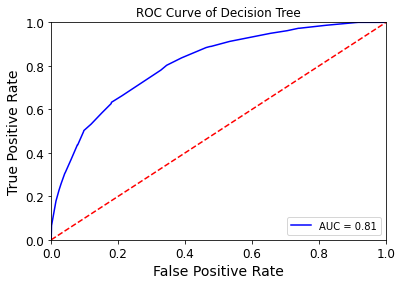

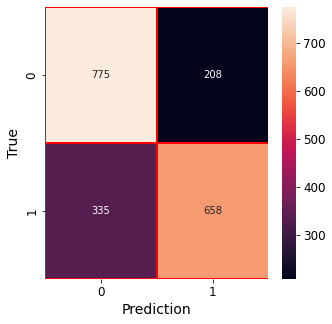

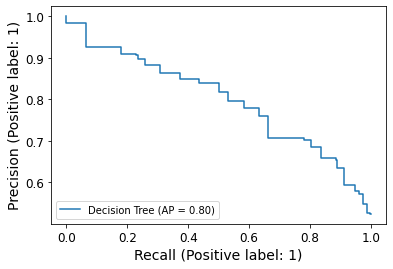

In [ ]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')

#os.chdir('/content/gdrive/MyDrive/MA440')
!pwd
!ls
from sklearn.tree import DecisionTreeClassifier

#df = pd.read_csv('/content/gdrive/MyDrive/MA440/JakobNickIsabelleJosephine/LoL First 10 Minutes #1.csv')
print(df)

column_name = "blueWins"
y = df[column_name]
x = df.drop(column_name, axis=1).copy()

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(x, y)

tree_clf.predict(x.iloc[2:90])

print(tree_clf.feature_importances_)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

y_pred = tree_clf.predict(X_test)
y_true=y_test

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
print('Accuracy:')
print(tree_clf.score(X_test,y_test))

print('Recall:')
print(recall_score(y_pred ,y_test))
print('Precision:')
print(precision_score(y_pred ,y_test))
print('F score:')
print(f1_score(y_pred, y_test))
from sklearn.metrics import cohen_kappa_score
print('Kappa score:')
print(cohen_kappa_score(y_pred, y_true))

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
 
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
 
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

    import graphviz
from graphviz import Source
from sklearn.tree import export_graphviz
 
export_graphviz(tree_clf,
        out_file=os.path.join(IMAGES_PATH, "blueWins.dot"),
        feature_names=x.columns,
        
        rounded=True,
        filled=True )
 
Source.from_file(os.path.join(IMAGES_PATH, "blueWins.dot"))

from sklearn.tree import DecisionTreeClassifier
column_name = "blueWins"
y = df[column_name]
x = df.drop(column_name, axis=1).copy()

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(x, y)

tree_clf.predict(x.iloc[2:90])

print(tree_clf.feature_importances_)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc


y_scores = tree_clf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Decision Tree')
plt.show()

#confusion matrix
cm= confusion_matrix(y_true, y_pred)

import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()


from sklearn.metrics import PrecisionRecallDisplay 

display = PrecisionRecallDisplay.from_estimator(tree_clf, X_test, y_test, name="Decision Tree")

In [ ]:
#Accuracy
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Riddle/Riddle 2021-2022/MA 440/JakobNickIsabelleJosephine/LoL First 10 Minutes #1.csv')
column_name = "blueWins"
y = df[column_name].copy()
df.drop(column_name, axis=1)
x = df

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

besti=0
bestScore=0

for i in range(1,25):
  tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
  tree_clf.fit(X_train, y_train)
  if(tree_clf.score(X_test,y_test) > bestScore):
    bestScore = tree_clf.score(X_test,y_test)
    besti = i

print('Optimal depth')
print(besti)
print('Accuracy at optimal depth')
print(bestScore)

Optimal depth
1
Accuracy at optimal depth
1.0


In [ ]:
#Precision
column_name = "blueWins"
y = df[column_name].copy()
df.drop(column_name, axis=1)
x = df

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)


from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_score
besti=0
bestScore=0
y_true=y_test

for i in range(3,25):
  tree_clf = DecisionTreeClassifier(max_depth=i, random_state=42)
  tree_clf.fit(X_train, y_train)
  y_pred = tree_clf.predict(X_test)
  if(precision_score(y_pred ,y_test) > bestScore):
    bestScore = precision_score(y_pred ,y_test)
    besti = i

print('Optimal depth')
print(besti)
print('Precision at optimal depth')
print(bestScore)


Optimal depth
3
Precision at optimal depth
1.0


In [ ]:
#Recallrate
column_name = "blueWins"
y = df[column_name].copy()
df.drop(column_name, axis=1)
x = df

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

export_graphviz(tree_clf,
        out_file=os.path.join(IMAGES_PATH, "blueTotalGold.dot"),
        feature_names=x.columns,
        
        rounded=True,
        filled=True )
 
Source.from_file(os.path.join(IMAGES_PATH, "blueTotalGold.dot"))


from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import recall_score
besti=0
bestScore=0
y_true=y_test

for i in range(3,25):
  tree_clf = DecisionTreeClassifier(max_depth=i, random_state=42)
  tree_clf.fit(X_train, y_train)
  y_pred = tree_clf.predict(X_test)
  if(recall_score(y_pred ,y_test) > bestScore):
    bestScore = recall_score(y_pred ,y_test)
    besti = i

print('Optimal depth')
print(besti)
print('Recall at optimal depth')
print(bestScore)

Optimal depth
3
Recall at optimal depth
1.0


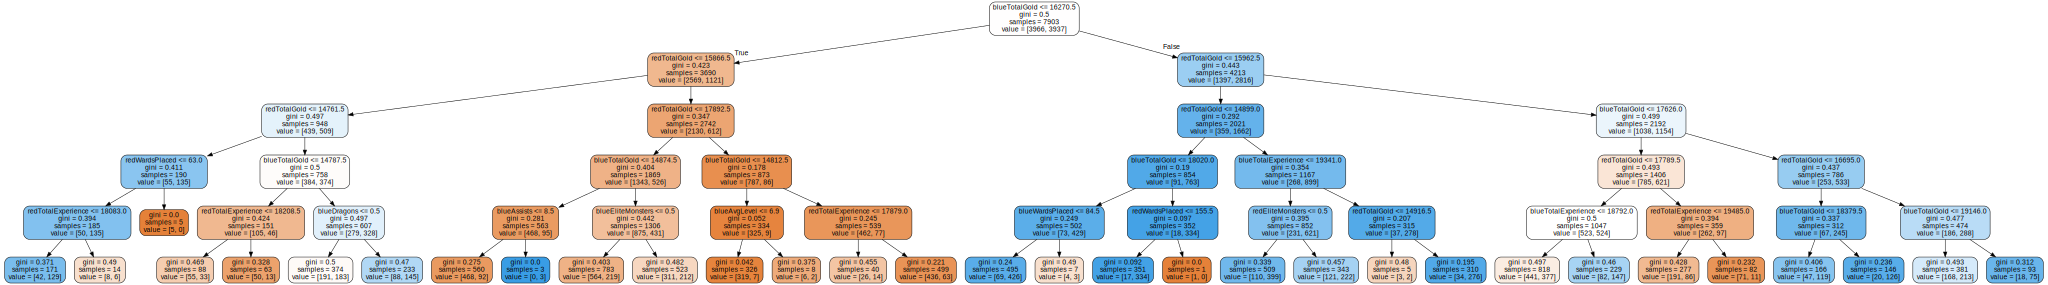

In [ ]:
#Total gold analysis
import graphviz
from graphviz import Source
from sklearn.tree import export_graphviz

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)
 
export_graphviz(tree_clf,
        out_file=os.path.join(IMAGES_PATH, "blueTotalGold.dot"),
        feature_names=x.columns,
        
        rounded=True,
        filled=True )
 
Source.from_file(os.path.join(IMAGES_PATH, "blueTotalGold.dot"))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
      blueWins  ...  redTotalJungleMinionsKilled
0            0  ...                           55
1            0  ...                           52
2            0  ...                           28
3            0  ...                           47
4            0  ...                           67
...        ...  ...                          ...
9874         1  ...                           34
9875         1  ...                           56
9876         0  ...                           60
9877         0  ...                           40
9878         1  ...                           46

[9879 rows x 26 columns]
0.7322874493927125


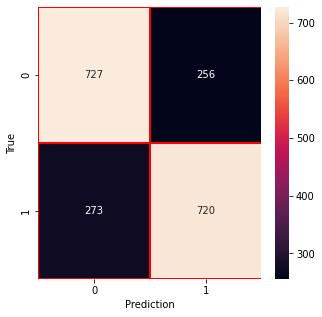

Recall:
0.7377049180327869
Precision:
0.7250755287009063
F score:
0.7313357034027425


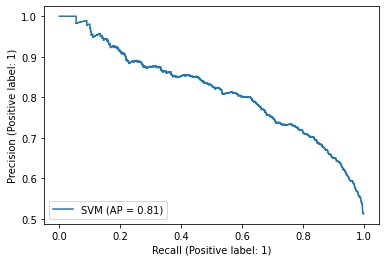

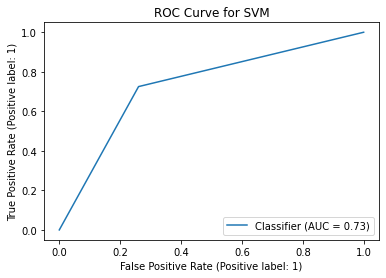

Best c value for Accuracy:
16
Best SVM score for Accuracy:
0.7322874493927125
Best c value for Precision:
16
Best SVM score for Precision:
0.7377049180327869
Best c value for Recall:
1
Best SVM score for Recall:
0.7366803278688525
Best c value:
16
Accuracy:
0.7322874493927125
Kappa score:
0.4646078073845221


In [ ]:
#SVM
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')

#df = pd.read_csv('/content/gdrive/MyDrive/MA440/JakobNickIsabelleJosephine/LoL First 10 Minutes #1.csv')
print(df) 

column_name = "blueWins"
normalized_df = (df-df.mean())/df.std()
y = df[column_name]
x = normalized_df.drop(column_name, axis=1).copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)



from sklearn import svm
from sklearn.svm import SVC
c = 16
clf = svm.SVC(kernel = 'linear', C = c)
clf.fit(X_train,y_train)

print(clf.score(X_test,y_test))

y_pred = clf.predict(X_test)
y_true=y_test



#confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_true, y_pred)
import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()

display = PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, name="SVM")

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

print('Recall:')
print(recall_score(y_pred ,y_test))
print('Precision:')
print(precision_score(y_pred ,y_test))
print('F score:')
print(f1_score(y_pred, y_test))


from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.title('ROC Curve for SVM')
plt.show()

#Model Tuning
besti = 0
bestScore = 0
bestKvalForPer = 0
bestKvalPer = 0
bestKvalForPRec = 0
bestKvalRec = 0

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

for i in range(1,25):
  clf = svm.SVC(kernel = 'linear', C = i)
  clf.fit(X_train, y_train)
  if(clf.score(X_test,y_test) > bestScore):
    bestScore = clf.score(X_test,y_test)
    besti = i
    y_pred = clf.predict(X_test)
  if(recall_score(y_pred ,y_test) > bestKvalPer):
    bestKvalPer = recall_score(y_pred ,y_test)
    bestKvalForPer = i
  if(precision_score(y_pred ,y_test) > bestKvalRec):
    bestKvalRec = recall_score(y_pred ,y_test)
    bestKvalForPRec = i


print('Best c value for Accuracy:')
print(besti)
print('Best SVM score for Accuracy:')
print(bestScore)
print('Best c value for Precision:')
print(bestKvalForPer)
print('Best SVM score for Precision:')
print(bestKvalPer)
print('Best c value for Recall:')
print(bestKvalForPRec)
print('Best SVM score for Recall:')
print(bestKvalRec)

print('Best c value:')
print(besti)
print('Accuracy:')
print(bestScore)

from sklearn.metrics import cohen_kappa_score
print('Kappa score:')
print(cohen_kappa_score(y_pred, y_true))


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/MA440
'First 15 Minutes LoL Data.csv'			      my_small_df.csv
'First 15 Minutes LoL Data Edit (Test for SVM).csv'   Salaries.csv
 images						      sonar_test.csv
 iris.csv					      sonar_train.csv
 JakobNickIsabelleJosephine			      Testing_Data_Set.csv
'LoL First 10 Minutes.csv'			      Training_Data_Set.csv
'LoL First 10 Minutes Edit (Test for SVM).csv'	      tree.dot
 myfirstdata.csv				      tree.png
 myLib.py					      twomillion.csv
Accuracy:
0.7155870445344129


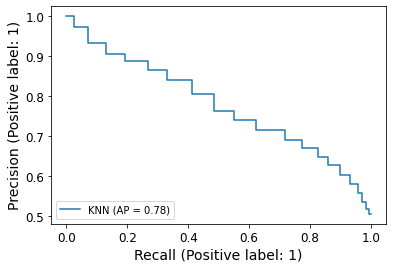

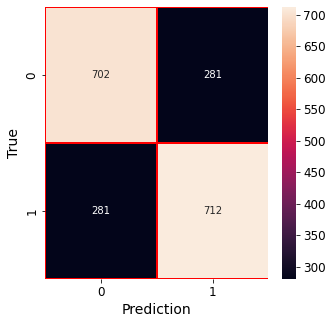

Recall:
0.7170191339375629
Precision:
0.7170191339375629
F score:
0.7170191339375628
Best k value for Accuracy:
21
Best KNN score for Accuracy:
0.7155870445344129
Best k value for Precision:
21
Best KNN score for Precision:
0.7170191339375629
Best k value for Recall:
29
Best KNN score for Recall:
0.7141434262948207


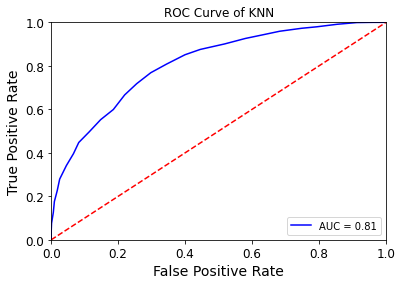

Kappa score:
0.43011523834502663


In [ ]:
#KNN
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')
#os.chdir('/content/gdrive/MyDrive/MA440')
!pwd
!ls

#Dr. Liu: Remember to change the folder that you read the .csv file from.
#For some reason, I was receiving errors when trying
#df = pd.read_csv('/content/gdrive/MyDrive/MA440/JakobNickIsabelleJosephine/LoL First 10 Minutes #1.csv')
column_name = "blueWins"
y = df.iloc[:,0].copy()
df.drop(column_name, axis=1)
normalized_df = (df-df.mean())/df.std().copy()

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import PrecisionRecallDisplay 
from sklearn.metrics import confusion_matrix
X = normalized_df.iloc[:, 1:25]
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=21)
 
knn.fit(X_train, y_train)
 
# Calculate the accuracy of the model
print('Accuracy:')
print(knn.score(X_test, y_test))

display = PrecisionRecallDisplay.from_estimator(knn, X_test, y_test, name="KNN")

y_pred = knn.predict(X_test)
y_true=y_test

#confusion matrix
cm= confusion_matrix(y_true, y_pred)

import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

print('Recall:')
print(recall_score(y_pred ,y_test))
print('Precision:')
print(precision_score(y_pred ,y_test))
print('F score:')
print(f1_score(y_pred, y_test))

#Model Tuning
besti = 0
bestScore = 0
bestKvalForPer = 0
bestKvalPer = 0
bestKvalForPRec = 0
bestKvalRec = 0

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

for i in range(3,30,2):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  if(knn.score(X_test,y_test) > bestScore):
    bestScore = knn.score(X_test,y_test)
    besti = i
  y_pred = knn.predict(X_test)
  if(recall_score(y_pred ,y_test) > bestKvalPer):
    bestKvalPer = recall_score(y_pred ,y_test)
    bestKvalForPer = i
  if(precision_score(y_pred ,y_test) > bestKvalRec):
    bestKvalRec = recall_score(y_pred ,y_test)
    bestKvalForPRec = i


print('Best k value for Accuracy:')
print(besti)
print('Best KNN score for Accuracy:')
print(bestScore)
print('Best k value for Precision:')
print(bestKvalForPer)
print('Best KNN score for Precision:')
print(bestKvalPer)
print('Best k value for Recall:')
print(bestKvalForPRec)
print('Best KNN score for Recall:')
print(bestKvalRec)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN')
plt.show()

from sklearn.metrics import cohen_kappa_score
print('Kappa score:')
print(cohen_kappa_score(y_pred, y_true))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[[722 261]
 [266 727]]


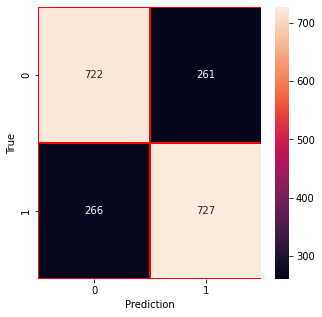

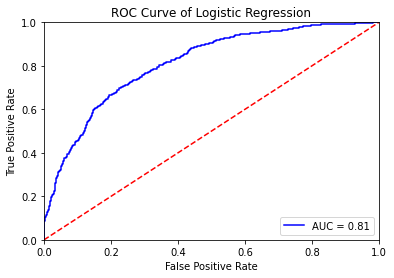

[-7.85113859e-06]
[[ 1.01425990e-01  1.00993528e-03  2.43768718e-03 -2.28954533e-03
  -3.02090095e-03  1.13433487e-02  1.01429049e-02  1.20044386e-03
  -1.68449784e-04  5.43506990e-04 -2.25997780e-04 -3.21319222e-05
   3.23251678e-03  4.25767961e-02 -6.04436172e-03 -2.64516263e-03
  -8.75327371e-05 -1.07663356e-02 -9.72388466e-03 -1.04245095e-03
   9.85104850e-04 -3.90510631e-04  2.03960509e-04 -2.95100931e-04
   7.26829673e-04  8.64049363e-03]]
Accuracy:
0.7351958700273307
Recall:
0.7358299595141701
Precision
0.7321248741188319
F score:
0.7339727410398789
Kappa score:
0.4665991902834008


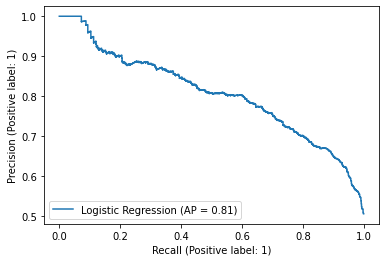

In [ ]:
#Logistic Regression
from sklearn import linear_model
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import numpy as np


column_name = "blueWins"
y = df[column_name].copy()
df.drop(column_name, axis=1)
x = df

log_regress = linear_model.LogisticRegression()

from sklearn.model_selection import train_test_split
from sklearn.metrics import PrecisionRecallDisplay


X_train, X_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

#---train the model---
log_regress.fit(X = X_train,
                y = y_train)

y_pred = log_regress.predict(X_test)
y_true=y_test

#confusion matrix
cm= confusion_matrix(y_true, y_pred)
print(cm)

import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()

from sklearn.metrics import roc_curve
from sklearn.metrics import auc


y_scores = log_regress.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression')
plt.show()

#---print trained model intercept---
print(log_regress.intercept_)     # [ 8.19393897]

#---print trained model coefficients---
print(log_regress.coef_)          # [[-0.54291739]]

#--print feature Importance
print('Accuracy:')
print(log_regress.score(x,y))
print('Recall:')
print(recall_score(y_pred ,y_test))
print('Precision')
print(precision_score(y_pred ,y_test))
print('F score:')
print(f1_score(y_pred, y_test))

display = PrecisionRecallDisplay.from_estimator(log_regress, X_test, y_test, name="Logistic Regression")

from sklearn.metrics import cohen_kappa_score
print('Kappa score:')
print(cohen_kappa_score(y_pred, y_true))
